In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#This contains information for team 1072s: The Harker School 2023 Scouting Analyzer
#Using data from the scouting app it does analysis to help scouters during matches and for public scouting analyzer project!

In [3]:
#Sets fileAddress, event key, and takes csv downloaded from tba 

#Where to find the data in google drive
fileAddress = '/Volumes/GoogleDrive/My Drive/Scouting Original/'

#imports data and assignes to data
data = pd.read_csv("matchData.csv")

#event key for tba
event = '2022cafr'

#gets tba_data from google drive
tba_data = pd.read_csv(f'{fileAddress}{event} tba data.csv')

#list of teams..not really used
teams = np.unique(np.array(tba_data[tba_data['level'] == 'qm'][['r1', 'r2', 'r3', 'b1', 'b2', 'b3']]).flatten())

In [4]:
data

,Unnamed: 0,match,team,team color,mobility,ground pick-up,locations,game piece,auto count,auto climb,...,climb time,break time,defense time,drive skill,defense skill,speed,stability,intake consistency,scouter,comments
0,0,1,8768,red,True,False,[],[],0,0,...,7,0,92,3,3,3,4.0,0.0,24ronaldc (1072),solid defense bot\nseems to have ground intake...
1,1,1,3189,blue,False,True,[2],['b'],0,0,...,3,23,0,0,0,2,2.0,0.0,26brennar (1072),NaN
2,2,1,8768,red,True,False,[18],['b'],1,0,...,0,0,0,2,2,4,3.0,0.0,milena (6662),NaN
3,3,1,100,red,False,False,"[5, 24]","['b', 'y']",1,0,...,0,0,0,3,1,3,3.0,1.0,thomas j. (6662),Stopped moving towards the end of the match an...
4,4,1,5817,blue,False,False,"[20, 21, 19]","['m', 'm', 'y']",0,0,...,0,0,0,2,0,2,2.0,0.0,26benjaminx (1072),dropped pieces
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,310,55,2551,red,True,False,"[4, 3, 22, 24]","['y', 'y', 'y', 'y']",0,1,...,15,0,0,3,2,3,2.0,3.0,25giae (1072),NaN
311,311,55,7419,blue,True,False,[],[],0,0,...,0,0,0,2,0,1,0.0,0.0,25agastyar (1072),No intake
312,312,55,3970,blue,False,False,"[24, 32, 14, 3, 13, 12, 4]","['y', 'b', 'b', 'b', 'y', 'y', 'b']",1,2,...,3,0,0,0,0,0,0.0,0.0,abbie s. (1072),NaN
313,313,55,1148,red,False,False,"[24, 2, 5, 8, 14, 22]","['y', 'b', 'b', 'b', 'b', 'b']",1,0,...,5,0,0,2,0,1,2.0,3.0,26mihirk (1072),Only picked up cubes from ground and chute. 3 ...


In [5]:
#Makes seperate data frame of data for just one specific team
#@param teamNum the team number to make the data frame for
#@return the specific data frame

def specificTeam(teamNum):
    team = teamNum
    team_data = data[data["team"] == team]
    return team_data


#Uses specificTeam to condense important offense information like number of cones, cubes, ect..
#Based on format by Timmy Chen
#@param teamNum team number
#@return a data frame of condensed information
def shotSummary(teamNum ):
    team = teamNum
    team_data = specificTeam(team)
    game_pieces = pd.DataFrame(columns = ["Match", "Cones", "Cubes", "Missed", "Total Shots"])
    x = len(game_pieces)
    y =0
    count = 0
    arrMissed = []
    for r in team_data['game piece']:
        cone = 0
        cube = 0
        missed = 0
 
  
        for s in r:
    
            if s =='b':
                cube +=1
            if s =='y':
                cone +=1
            if s == 'm':
                missed +=1
                
        total =cone +cube+missed
        game_pieces.loc[count] = [count,cone,cube,missed,total]
        count +=1

    return game_pieces
            
        
    

In [6]:
#data frame of just locations. Is used in sorted Array for location graphing
def combineLocations(team):
    spec = specificTeam(team)
    x = pd.DataFrame(columns = ['locations'])
    count = 0
    for r in spec['locations']:
        x.loc[count] = r
        count+=1
    return x    

#takes location of specified match
def sortedArray(team, matchNum):

    x = combineLocations(team)['locations']


    arr = x[matchNum]
    arr = arr.replace("[", "")
    arr = arr.replace("]", "")
    arr = arr.replace(",", "")
    arr = arr.split()
    return arr
    

In [7]:


def specifShot(team):
    spec = specificTeam(team)
    x = pd.DataFrame(columns = ['game piece'])
    count = 0
    for r in spec['game piece']:
        x.loc[count] = r
        count+=1
    return x    



def sortedShot(team, matchNum):

    x = specifShot(team)['game piece']


    arr = x[matchNum]
    arr = arr.replace("[", "")
    arr = arr.replace("]", "")
    arr = arr.replace(",", "")
    arr = arr.replace("''", "")
    arr = arr.split()
    return arr

In [8]:
def specifAny(name, team):
    spec = specificTeam(team)
    x = pd.DataFrame(columns = [name])
    count = 0
    for r in spec[name]:
        x.loc[count] = r
        count+=1
    return x    


#not for arrays
def MatchSpecAny(name, team, match):
    x = specifAny(name, team)[name]


    arr = x[match]
    return arr

In [9]:
def locationsOfMissed(team, matchNum): 
    overallLoc = sortedArray(team, matchNum)
    print(overallLoc)
    overallShot = sortedShot(team, matchNum)
    print(overallShot)
    m = []
    count = 0
    
    for i in overallShot: 
        if (i == "'m'"):
            m.append(count)
        count += 1
    locM = []
    counter = 0
    for i in m:
        locM.append(int(overallLoc[i]))
    locM.sort()
    return locM
   

In [34]:
visualize_loactions('670')

NameError: name 'visualize_loactions' is not defined

In [10]:
#WARNING: IF TEAM MISSES THEN MAKES, REPORTS AS MISSED..i think
#VISUALIZING 
def visualizeLocations(team, matchNum):
    vis = pd.DataFrame(columns = [1, 2, 3, 4, 5, 6, 7, 8, 9])
    
    arr = sortedArray(team, matchNum)
    missed = locationsOfMissed(team, matchNum)
    print("missed")
    print(missed)
    

    topRow = []
    midRow = []
    lowRow = []

    for i in arr:
        i = int(i)
        if i <= 9:
            topRow.append(i)
        if (i > 9) & (i<=18) :
            midRow.append(i)    
        if (i < 30) & (i>18):
            lowRow.append(i)
        

    topRow.sort()
    midRow.sort()
    lowRow.sort()
    print('top')
    print(topRow)
    print('mid')
    print(midRow)
    print('low')
    print(lowRow)
    
    last = 0;

    nums = [1+last, 2+last, 3+last, 4+last, 5+last, 6+last, 7+last, 8+last, 9+last]
    for r in nums:
        if missed.count(r) !=0 :
            nums[r-1] = "x"
        
        elif topRow.count(r) != 0:
            nums[r-1] = "O"
        else:
            nums[r-1] = "-"
    vis.loc[0]  = nums
    last +=9
   

    nums = [1+last, 2+last, 3+last, 4+last, 5+last, 6+last, 7+last, 8+last, 9+last]
    for r in nums:
        if missed.count(r) !=0 :
            nums[r-10] = "x"
        elif midRow.count(r) != 0:
            nums[r-10] = "O"
    
        else:
            nums[r-10] = "-"
    vis.loc[1]  = nums
    
    last +=9

    nums = [1+last, 2+last, 3+last, 4+last, 5+last, 6+last, 7+last, 8+last, 9+last]
    for r in nums:
        if missed.count(r) !=0 :
            nums[r-19] = "x"
        elif lowRow.count(r) != 0:
            nums[r-19] = "O"
      
        else:
            nums[r-19] = "-"
    vis.loc[2]  = nums
    
    return vis

In [11]:

#under construction T-T
def linkCounter(arr):
    current = 0
    index = 0
    link = 0
    for index in arr:
        index = int(index)
        
        if (int(arr[i+1]) == int(arr[i])+1):
            if (int(arr[i+2]) == int(arr[i])+2):
                link +=1
            else:
                index +=1
        else:
            index +=1
    return link            


In [12]:
#scores are not fine tuned
#SORTING
def defenseScore(team):
    total = 0
    count = 0
    spec = specificTeam(team)
    stats = shotSummary(team)
    
    for r in spec['defense time']:
        total += (r/2)
        count +=1
        
    for r in spec['defense skill']:
        total += 10*r
    for r in spec['speed']:
        total += 30*r
    for r in spec['drive skill']:
        total += 30*r
    return round (total, 2)

        
    
def offenseScore(team):
    spec = specificTeam(team)
    stats = shotSummary(team)
    count = 0
    total = 0
    for r in stats['Cones']:
        total += r*10
        count +=1
    for r in stats['Cubes']:
        total += r*10
    for r in stats['Missed']:
        total -= (r/2)
    for r in stats['Total Shots']:
        total += r
    for r in spec['ground pick-up']:
        if r == True: 
            total +=10
    for r in spec['auto count']:
        total += r*5
    for r in spec['end climb']:
        total +=r*20
    for r in spec['climb time']:
        if r > 30:
            total -= 10
        if r <30:
            total += 30
    for r in spec['drive skill']:
        total += 30*r
    for r in spec['speed']:
        total += 30*r
    return round(total, 2)


    
    
def overallScore(team):
    x = defenseScore(team)
    y = offenseScore(team)
    spec = specificTeam(team)
    total = 0 
    for r in spec['break time']:
        total -= r
    return  (x + 5*y) +total



In [13]:
team_stats = pd.DataFrame(columns = ["team", 'defense score', 'offense score', 'overall score'])
counter =0
for r in teams:
    team = r
    team_stats.loc[counter] = [r, defenseScore(team), offenseScore(team), overallScore(team)]
    counter+=1


In [14]:
#Sorting methods
def sortOverallScoreUp():
     return team_stats.sort_values('overall score', ascending = False)

def sortMethod(rowName, asc):
    return team_stats.sort_values(rowName, ascending = asc)


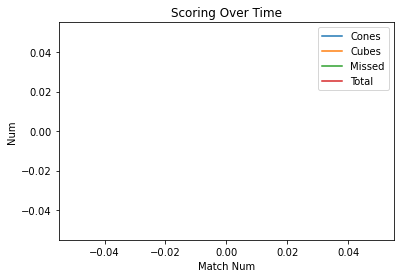

In [15]:
#GRAPHING

team = 254

dataS = shotSummary(254)


x_Y = dataS['Match']
y_Y = dataS['Cones']
y_B = dataS['Cubes']
y_M = dataS['Missed']
y_T = dataS['Total Shots']

plt.plot(x_Y, y_Y, label = 'Cones')
plt.plot(x_Y, y_B, label = 'Cubes')
plt.plot(x_Y, y_M, label = 'Missed')
plt.plot(x_Y, y_T, label = 'Total')

plt.title('Scoring Over Time')
plt.xlabel('Match Num')
plt.ylabel('Num')
plt.legend()
plt.show()

#plt.savefig('my_plot.png')

In [31]:
specificTeam('670')

,Unnamed: 0,match,team,team color,mobility,ground pick-up,locations,game piece,auto count,auto climb,...,climb time,break time,defense time,drive skill,defense skill,speed,stability,intake consistency,scouter,comments
12,12,2,670,red,False,False,[],[],0,0,...,4,0,96,2,1,2,1.0,0.0,25atharvg (1072),670 just played defense the entire time but th...
15,15,2,670,red,False,False,[],[],0,0,...,8,0,89,2,3,1,3.0,0.0,26alberty (1072),- westcoast bot\n- not the fastest\n- does def...
88,88,12,670,red,False,False,"[18, 15, 16, 9]","['y', 'y', 'b', 'y']",1,0,...,0,0,0,1,2,2,3.0,0.0,25aaravb (1072),NaN
112,112,16,670,blue,True,False,"[27, 18, 17, 9, 8, 7]","['y', 'y', 'b', 'y', 'b', 'b']",1,0,...,6,0,0,3,1,2,3.0,3.0,26mihirk (1072),"Ground pickup, but favors human player pickup...."
143,143,24,670,red,False,False,"[22, 32, 24, 6, 21, 4, 4, 4, 5]","['y', 'b', 'b', 'y', 'y', 'm', 'm', 'y', 'b']",1,2,...,4,0,0,4,2,4,3.0,3.0,25atharvg (1072),670 literally carried.
194,194,31,670,red,True,False,"[18, 16, 16, 9, 9, 7]","['y', 'b', 'y', 'b', 'y', 'y']",1,0,...,16,5,0,4,1,2,4.0,3.0,25giae (1072),NaN
195,195,31,670,red,True,False,"[18, 17, 16, 8, 9, 7, 6]","['y', 'b', 'y', 'b', 'y', 'y', 'b']",1,0,...,0,0,0,4,2,3,3.0,3.0,25aaravb (1072),NaN
197,197,31,670,red,True,True,"[18, 17, 16, 8, 9, 7, 26]","['y', 'b', 'y', 'b', 'y', 'y', 'b']",1,0,...,4,0,0,3,0,3,3.0,4.0,26alberty (1072),- REALLY GOOD AND STABLE INTAKE\n- consistent ...
265,265,47,670,blue,True,False,"[16, 17, 25, 27]","['y', 'b', 'y', 'y']",0,0,...,0,0,0,2,1,2,4.0,3.0,25audreyc (1072),like ik it’s rated high but they kinda fell off
295,295,52,670,blue,False,False,"[25, 24, 32, 22, 21, 20, 19]","['y', 'y', 'b', 'y', 'y', 'b', 'y']",0,0,...,0,0,0,4,0,3,3.0,4.0,25agastyar (1072),NaN


In [32]:
shotSummary('670')

,Match,Cones,Cubes,Missed,Total Shots
0,0,0,0,0,0
1,1,0,0,0,0
2,2,3,1,0,4
3,3,3,3,0,6
4,4,4,3,2,9
5,5,4,2,0,6
6,6,4,3,0,7
7,7,4,3,0,7
8,8,3,1,0,4
9,9,5,2,0,7


In [33]:
shotSummary('1072')

,Match,Cones,Cubes,Missed,Total Shots
0,0,3,2,0,5
1,1,1,0,3,4
2,2,1,2,2,5
3,3,4,2,1,7
4,4,2,2,0,4


###### specificTeam('5817')

In [73]:
def averageTeam(team, name):
    spec = specificTeam(team)
    total = 0
    count = 0
    for i in spec[name]:
        total += i
        count +=1
    if count == 0:
        return total
    return round(total/count, 2)

In [74]:
averageTeam(701, 'end climb')

0

In [75]:
#POOP: players of our pack
def radarChartPOOP(team, team2, team3):
    categories = ['auto count', 'end climb', 'drive skill', 'defense skill', 'speed', '']
    team = [averageTeam(team, 'auto count'), averageTeam(team, 'end climb'), averageTeam(team, 'drive skill'),averageTeam(team, 'defense skill'), averageTeam(team, 'speed'), averageTeam(team, 'auto count')]
    team2 = [averageTeam(team2, 'auto count'), averageTeam(team2, 'end climb'), averageTeam(team2, 'drive skill'),averageTeam(team2, 'defense skill'), averageTeam(team2, 'speed'),averageTeam(team2, 'auto count') ]
    team3 = [averageTeam(team3, 'auto count'), averageTeam(team3, 'end climb'), averageTeam(team3, 'drive skill'),averageTeam(team3, 'defense skill'), averageTeam(team3, 'speed'), averageTeam(team3, 'auto count')]
    
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(team))

    plt.figure(figsize=(8, 8))
    plt.subplot(polar=True)
    plt.plot(label_loc, team, label='team')
    plt.plot(label_loc, team2, label='team')
    plt.plot(label_loc, team3, label='team')
   
    plt.title('Radar Chart', size=20)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
    plt.legend()
    plt.show()

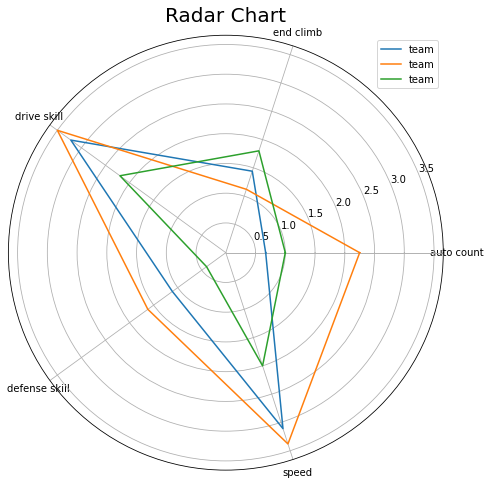

In [76]:
radarChartPOOP('973', '5940', '1072')

In [21]:
radarChart(701)

NameError: name 'radarChart' is not defined

In [ ]:
## **MAIN** ***TESTER***
#doesn't include graph (which is above)









In [59]:
filler = '670'
matcc= 0

In [61]:
specificTeam('1072')

,Unnamed: 0,match,team,team color,mobility,ground pick-up,locations,game piece,auto count,auto climb,...,climb time,break time,defense time,drive skill,defense skill,speed,stability,intake consistency,scouter,comments
18,18,3,1072,red,True,False,"[5, 2, 7, 14, 15]","['b', 'b', 'y', 'y', 'y']",1,1,...,0,0,0,2,0,2,1.0,1.0,24ronaldc (1072),maybe ops is better than tech\n\ncould use mor...
126,126,21,1072,red,True,False,"[6, 21, 12, 14]","['m', 'm', 'y', 'm']",1,1,...,8,0,0,2,1,2,3.0,1.0,25ericl (1072),Intake was not consistent and dropped cones
160,160,26,1072,red,True,False,"[7, 13, 13, 14, 15]","['b', 'm', 'y', 'b', 'm']",1,0,...,4,0,0,3,1,3,1.0,1.0,25atharvg (1072),:(
200,200,32,1072,red,False,False,"[5, 13, 12, 1, 1, 10, 20]","['b', 'y', 'y', 'y', 'm', 'y', 'b']",1,2,...,4,0,0,0,0,0,0.0,0.0,abbie s. (1072),tbh i think controlling our speed really helpe...
275,275,49,1072,blue,False,False,"[26, 7, 17, 16]","['b', 'y', 'b', 'y']",1,0,...,0,0,0,4,0,3,3.0,2.0,25agastyar (1072),I think we should form an alliance with this t...


In [26]:

####DATA TABLES



specificTeam(	'3970')

,Unnamed: 0,match,team,team color,mobility,ground pick-up,locations,game piece,auto count,auto climb,...,climb time,break time,defense time,drive skill,defense skill,speed,stability,intake consistency,scouter,comments
27,27,4,3970,red,False,False,"[4, 7, 7, 6, 15, 24, 3, 3, 21]","['y', 'y', 'm', 'y', 'y', 'y', 'y', 'm', 'b']",1,0,...,3,0,0,3,1,3,3.0,2.0,abbie s. (1072),NaN
31,31,4,3970,red,False,False,"[4, 7, 6, 13, 15, 3, 3]","['y', 'm', 'y', 'y', 'y', 'm', 'm']",1,0,...,6,0,0,2,1,3,4.0,4.0,24brindhac (1072),not much defense. intake pretty fast (ground a...
32,32,4,3970,red,False,False,"[4, 24, 7, 6, 13, 15, 22, 3, 4]","['y', 'y', 'm', 'y', 'y', 'y', 'y', 'm', 'y']",1,0,...,6,0,0,2,0,3,3.0,2.0,griffinc (6662),"Had a roughly 50/50 consistency at high, 100 a..."
62,62,8,3970,blue,False,False,"[27, 13, 24, 24, 32]","['y', 'y', 'm', 'm', 'b']",1,0,...,12,0,0,2,0,3,4.0,2.0,24salonis (1072),Much better intaking and holding cones than cubes
98,98,13,3970,blue,False,False,"[24, 27, 25, 22, 24, 26, 32, 9]","['y', 'y', 'y', 'y', 'y', 'b', 'b', 'b']",1,0,...,3,0,0,4,2,4,4.0,4.0,26sahilj (1072),Great robot overall their teammates messed em ...
179,179,29,3970,red,False,False,"[6, 20, 21]","['y', 'b', 'b']",1,1,...,12,15,33,1,2,2,3.0,0.0,abbie s. (1072),NaN
258,258,46,3970,red,True,False,"[1, 13, 14, 3, 11, 22]","['y', 'y', 'y', 'y', 'b', 'b']",1,0,...,10,0,0,4,3,2,4.0,4.0,25aaravb (1072),good driving. Overall very good.
260,260,46,3970,red,True,True,"[1, 13, 15, 3, 20, 22]","['y', 'y', 'y', 'y', 'b', 'b']",1,0,...,0,0,0,3,0,3,4.0,2.0,26benjaminx (1072),inconsistent cone ground intake but consistent...
312,312,55,3970,blue,False,False,"[24, 32, 14, 3, 13, 12, 4]","['y', 'b', 'b', 'b', 'y', 'y', 'b']",1,2,...,3,0,0,0,0,0,0.0,0.0,abbie s. (1072),NaN


specifAny('drive skill', '3970')

In [28]:
specifAny( 'drive skill','3970')

,drive skill
0,3
1,2
2,2
3,2
4,4
5,1
6,4
7,3
8,0


In [51]:
MatchSpecAny('drive skill', filler, matcc)

2

In [39]:
shotSummary(filler)

,Match,Cones,Cubes,Missed,Total Shots
0,0,3,2,0,5
1,1,1,0,3,4
2,2,1,2,2,5
3,3,4,2,1,7
4,4,2,2,0,4


In [52]:
combineLocations(filler) #not that important

,locations
0,"[20, 21, 19]"
1,"[24, 15, 15, 19]"
2,[]
3,"[14, 32]"
4,[20]
5,[20]
6,[]
7,"[8, 10, 12, 13]"


In [53]:
sortedArray(filler, matcc)#not that important

['20', '21', '19']

In [55]:
specifShot(filler)#not that important

,game piece
0,"['m', 'm', 'y']"
1,"['y', 'y', 'm', 'y']"
2,[]
3,"['y', 'y']"
4,['b']
5,['b']
6,[]
7,"['b', 'y', 'y', 'y']"


In [56]:
sortedShot(filler, matcc)#not that important

["'m'", "'m'", "'y'"]

In [ ]:


## LOCATIONS

In [ ]:
locationsOfMissed(filler, matcc) #not that important

In [ ]:
visualizeLocations(filler, matcc)

In [ ]:


## RANKINGS




In [ ]:
defenseScore(filler) #not that important

In [ ]:
offenseScore(filler) #not that important

In [ ]:
overallScore(filler) #not that important

In [ ]:
sortMethod('overall score', True)